> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

Smoke test APOD: OK - campos essenciais presentes
copyright: 
Brian Meyers

explanation: Ten thousand years ago, before the dawn of recorded human history, a new light would suddenly have appeared in the night sky and faded after a few weeks.  Today we know this light was from a supernova, or exploding star, and record the expanding debris cloud as the Veil Nebula, a supernova remnant.  This sharp telescopic view is centered on a western segment of the Veil Nebula cataloged as NGC 6960 but less formally known as the Witch's Broom Nebula.  Blasted out in the cataclysmic explosion, an interstellar shock wave plows through space sweeping up and exciting interstellar material. Imaged with narrow band filters, the glowing filaments are like long ripples in a sheet seen almost edge on, remarkably well separated into atomic hydrogen (red) and oxygen (blue-green) gas. The complete supernova remnant lies about 1400 light-years away towards the constellation Cygnus. This Witch's Broom actually s

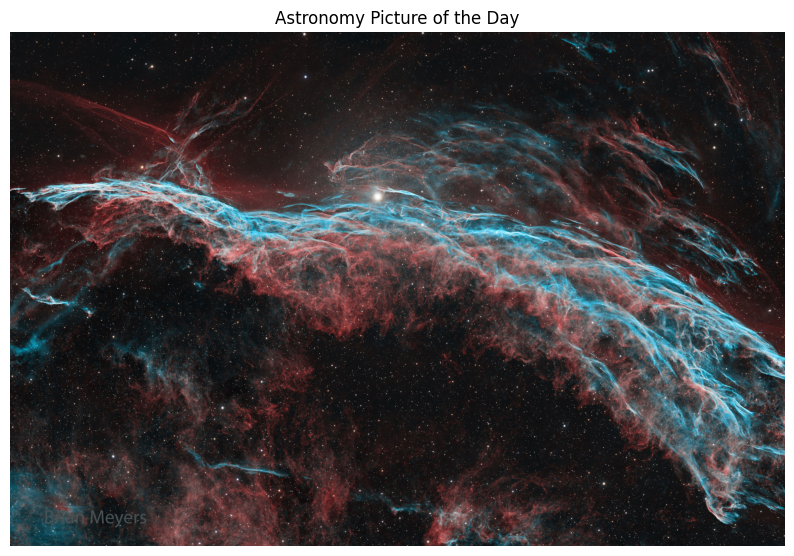

In [7]:
# Q2: Astronomy Picture of the Day (APOD) - versão refatorada para testes
import requests
from skimage import io
import matplotlib.pyplot as plt
from typing import Dict, Any, Optional

API_URL = 'https://api.nasa.gov/planetary/apod'

def fetch_apod(api_key: str = 'DEMO_KEY') -> Dict[str, Any]:
    """Faz a requisição à API APOD e retorna o JSON da resposta."""
    params = {'api_key': api_key}
    resp = requests.get(API_URL, params=params, timeout=10)
    resp.raise_for_status()
    return resp.json()

def get_image_url(apod_json: Dict[str, Any]) -> Optional[str]:
    """Retorna hdurl ou url se disponível, caso contrário None."""
    return apod_json.get('hdurl') or apod_json.get('url')

def show_apod(apod_json: Dict[str, Any]):
    """Exibe informações e a imagem do APOD usando skimage+matplotlib."""
    print('copyright:', apod_json.get('copyright'))
    print('explanation:', apod_json.get('explanation'))
    img_url = get_image_url(apod_json)
    if not img_url:
        raise RuntimeError('Nenhuma URL de imagem encontrada na resposta APOD')
    print(f'Baixando imagem de: {img_url}')
    img = io.imread(img_url)
    plt.figure(figsize=(10,8))
    plt.imshow(img)
    plt.title(apod_json.get('title', 'APOD'))
    plt.axis('off')
    plt.show()

# Célula de teste (smoke test) para Q2 - busca e exibe APOD
# Observação: essa célula faz uma requisição real à API da NASA.
try:
    apod = fetch_apod()
    # verificações simples
    assert isinstance(apod, dict), 'Resposta APOD não é um dict'
    assert 'title' in apod, 'Campo title ausente'
    assert get_image_url(apod) is not None, 'Nenhuma imagem disponível na resposta'
    print('Smoke test APOD: OK - campos essenciais presentes')
    # Mostrar a imagem (comentário: dependendo do ambiente, a imagem será exibida abaixo)
    show_apod(apod)
except Exception as e:
    print('Smoke test APOD: FALHOU')
    raise

#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [8]:
# Q3: Limites - imprimir headers da resposta APOD e campos X-RateLimit*
def apod_rate_limits(api_key: str = 'DEMO_KEY'):
    """Faz uma requisição GET e imprime headers relevantes (RateLimit)."""
    resp = requests.get(API_URL, params={'api_key': api_key}, timeout=10)
    print('HTTP status:', resp.status_code)
    # imprimir todos os headers (pode ser muitos)
    for k, v in resp.headers.items():
        print(f'{k}: {v}')
    # Campos pedidos
    limit = resp.headers.get('X-RateLimit-Limit')
    remaining = resp.headers.get('X-RateLimit-Remaining')
    print('\nX-RateLimit-Limit:', limit)
    print('X-RateLimit-Remaining:', remaining)

# Executar a checagem (smoke)
apod_rate_limits()

HTTP status: 200
Date: Mon, 06 Oct 2025 14:27:42 GMT
Content-Type: application/json
Transfer-Encoding: chunked
Connection: keep-alive
Access-Control-Allow-Origin: *
Access-Control-Expose-Headers: X-RateLimit-Limit, X-RateLimit-Remaining
Age: 0
Content-Encoding: gzip
Strict-Transport-Security: max-age=31536000; includeSubDomains; preload
Vary: Accept-Encoding
Via: https/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])
X-Api-Umbrella-Request-Id: cpn7lsslem3afjftboag
X-Cache: MISS
X-Content-Type-Options: nosniff
X-Ratelimit-Limit: 10
X-Ratelimit-Remaining: 3
X-Vcap-Request-Id: ed92b5a3-4350-4210-46de-1ea18a44487a
X-Frame-Options: DENY

X-RateLimit-Limit: 10
X-RateLimit-Remaining: 3


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

Total latest_photos: 16
Rover: Curiosity
Camera: CHEMCAM_RMI
Baixando imagem Mars: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04679/opgs/edr/ccam/CR0_812867161EDR_F1190924CCAM02679M_.JPG


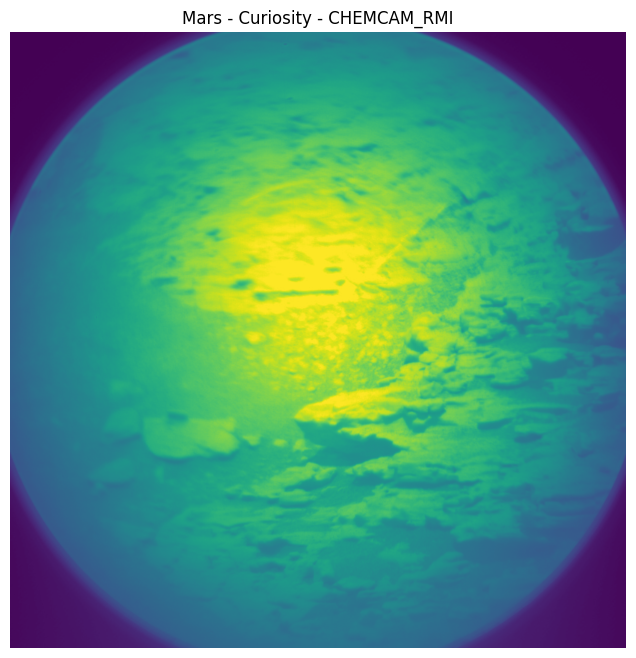

In [9]:
# Q4: Mars Rover - obter fotos mais recentes do rover Curiosity e exibir a primeira

def fetch_mars_latest(api_key: str = 'DEMO_KEY') -> dict:
    """Busca as latest_photos do rover Curiosity."""
    url = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/latest_photos'
    resp = requests.get(url, params={'api_key': api_key}, timeout=10)
    resp.raise_for_status()
    return resp.json()


def show_mars_first_photo(api_key: str = 'DEMO_KEY'):
    data = fetch_mars_latest(api_key)
    photos = data.get('latest_photos') or []
    print('Total latest_photos:', len(photos))
    if not photos:
        print('Nenhuma foto disponível')
        return
    photo = photos[0]
    print('Rover:', photo.get('rover', {}).get('name'))
    print('Camera:', photo.get('camera', {}).get('full_name'))
    img_url = photo.get('img_src')
    print('Baixando imagem Mars:', img_url)
    img = io.imread(img_url)
    plt.figure(figsize=(10,8))
    plt.imshow(img)
    plt.title(f"Mars - {photo.get('rover', {}).get('name')} - {photo.get('camera', {}).get('name')}")
    plt.axis('off')
    plt.show()

# Smoke test Mars
try:
    show_mars_first_photo()
except Exception as e:
    print('Q4 Mars: FALHOU')
    raise

#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



# Q5: NEO Feed - buscar objetos próximos hoje e listar alguns atributos
from datetime import date, timedelta

def fetch_neo_feed(api_key: str='DEMO_KEY', start_date: str=None, end_date: str=None) -> dict:
    if start_date is None:
        start_date = date.today().isoformat()
    if end_date is None:
        end_date = start_date
    url = 'https://api.nasa.gov/neo/rest/v1/feed'
    resp = requests.get(url, params={'api_key': api_key, 'start_date': start_date, 'end_date': end_date}, timeout=10)
    resp.raise_for_status()
    return resp.json()


def show_neo_summary(api_key: str='DEMO_KEY'):
    data = fetch_neo_feed(api_key)
    count = data.get('element_count')
    print('NEO element_count:', count)
    near = data.get('near_earth_objects', {})
    # mostrar apenas o primeiro dia
    for d, objs in list(near.items())[:1]:
        print(f'On date {d} found {len(objs)} objects')
        for obj in objs[:5]:
            name = obj.get('name')
            hazardous = obj.get('is_potentially_hazardous_asteroid')
            est_diameter = obj.get('estimated_diameter', {}).get('meters', {})
            max_d = est_diameter.get('estimated_diameter_max')
            print(f'- {name}, hazardous={hazardous}, max_diameter_m={max_d}')

# Smoke test NEO
try:
    show_neo_summary()
except Exception as e:
    print('Q5 NEO: FALHOU')
    raise